In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
)
from sklearn.preprocessing import (
    PolynomialFeatures, 
    StandardScaler, 
    MinMaxScaler, 
    LabelEncoder, 
    OrdinalEncoder,
)
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [159]:
df = pd.read_csv("loan_data_v3.csv")

In [160]:
df.head()

,Unnamed: 0,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,4847,26.0,male,Associate,43996.0,4,RENT,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0
1,13802,22.0,female,Bachelor,115708.0,0,MORTGAGE,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0
2,39763,25.0,female,High School,57827.0,0,RENT,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0
3,39215,31.0,female,Master,126727.0,9,RENT,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0
4,26369,33.0,female,Associate,120987.0,10,OWN,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      8000 non-null   int64  
 1   person_age                      7512 non-null   float64
 2   person_gender                   7706 non-null   object 
 3   person_education                7578 non-null   object 
 4   person_income                   8000 non-null   float64
 5   person_emp_exp                  8000 non-null   int64  
 6   person_home_ownership           8000 non-null   object 
 7   loan_amnt                       7664 non-null   float64
 8   loan_intent                     8000 non-null   object 
 9   loan_int_rate                   8000 non-null   float64
 10  loan_percent_income             8000 non-null   float64
 11  cb_person_cred_hist_length      8000 non-null   float64
 12  credit_score                    74

In [162]:
df.isna().sum()

Unnamed: 0                          0
person_age                        488
person_gender                     294
person_education                  422
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                         336
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      522
previous_loan_defaults_on_file      0
loan_status                       250
dtype: int64

In [163]:
df.drop(columns="Unnamed: 0", inplace=True)

In [164]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,26.0,male,Associate,43996.0,4,RENT,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0
1,22.0,female,Bachelor,115708.0,0,MORTGAGE,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0
2,25.0,female,High School,57827.0,0,RENT,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0
3,31.0,female,Master,126727.0,9,RENT,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0
4,33.0,female,Associate,120987.0,10,OWN,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0


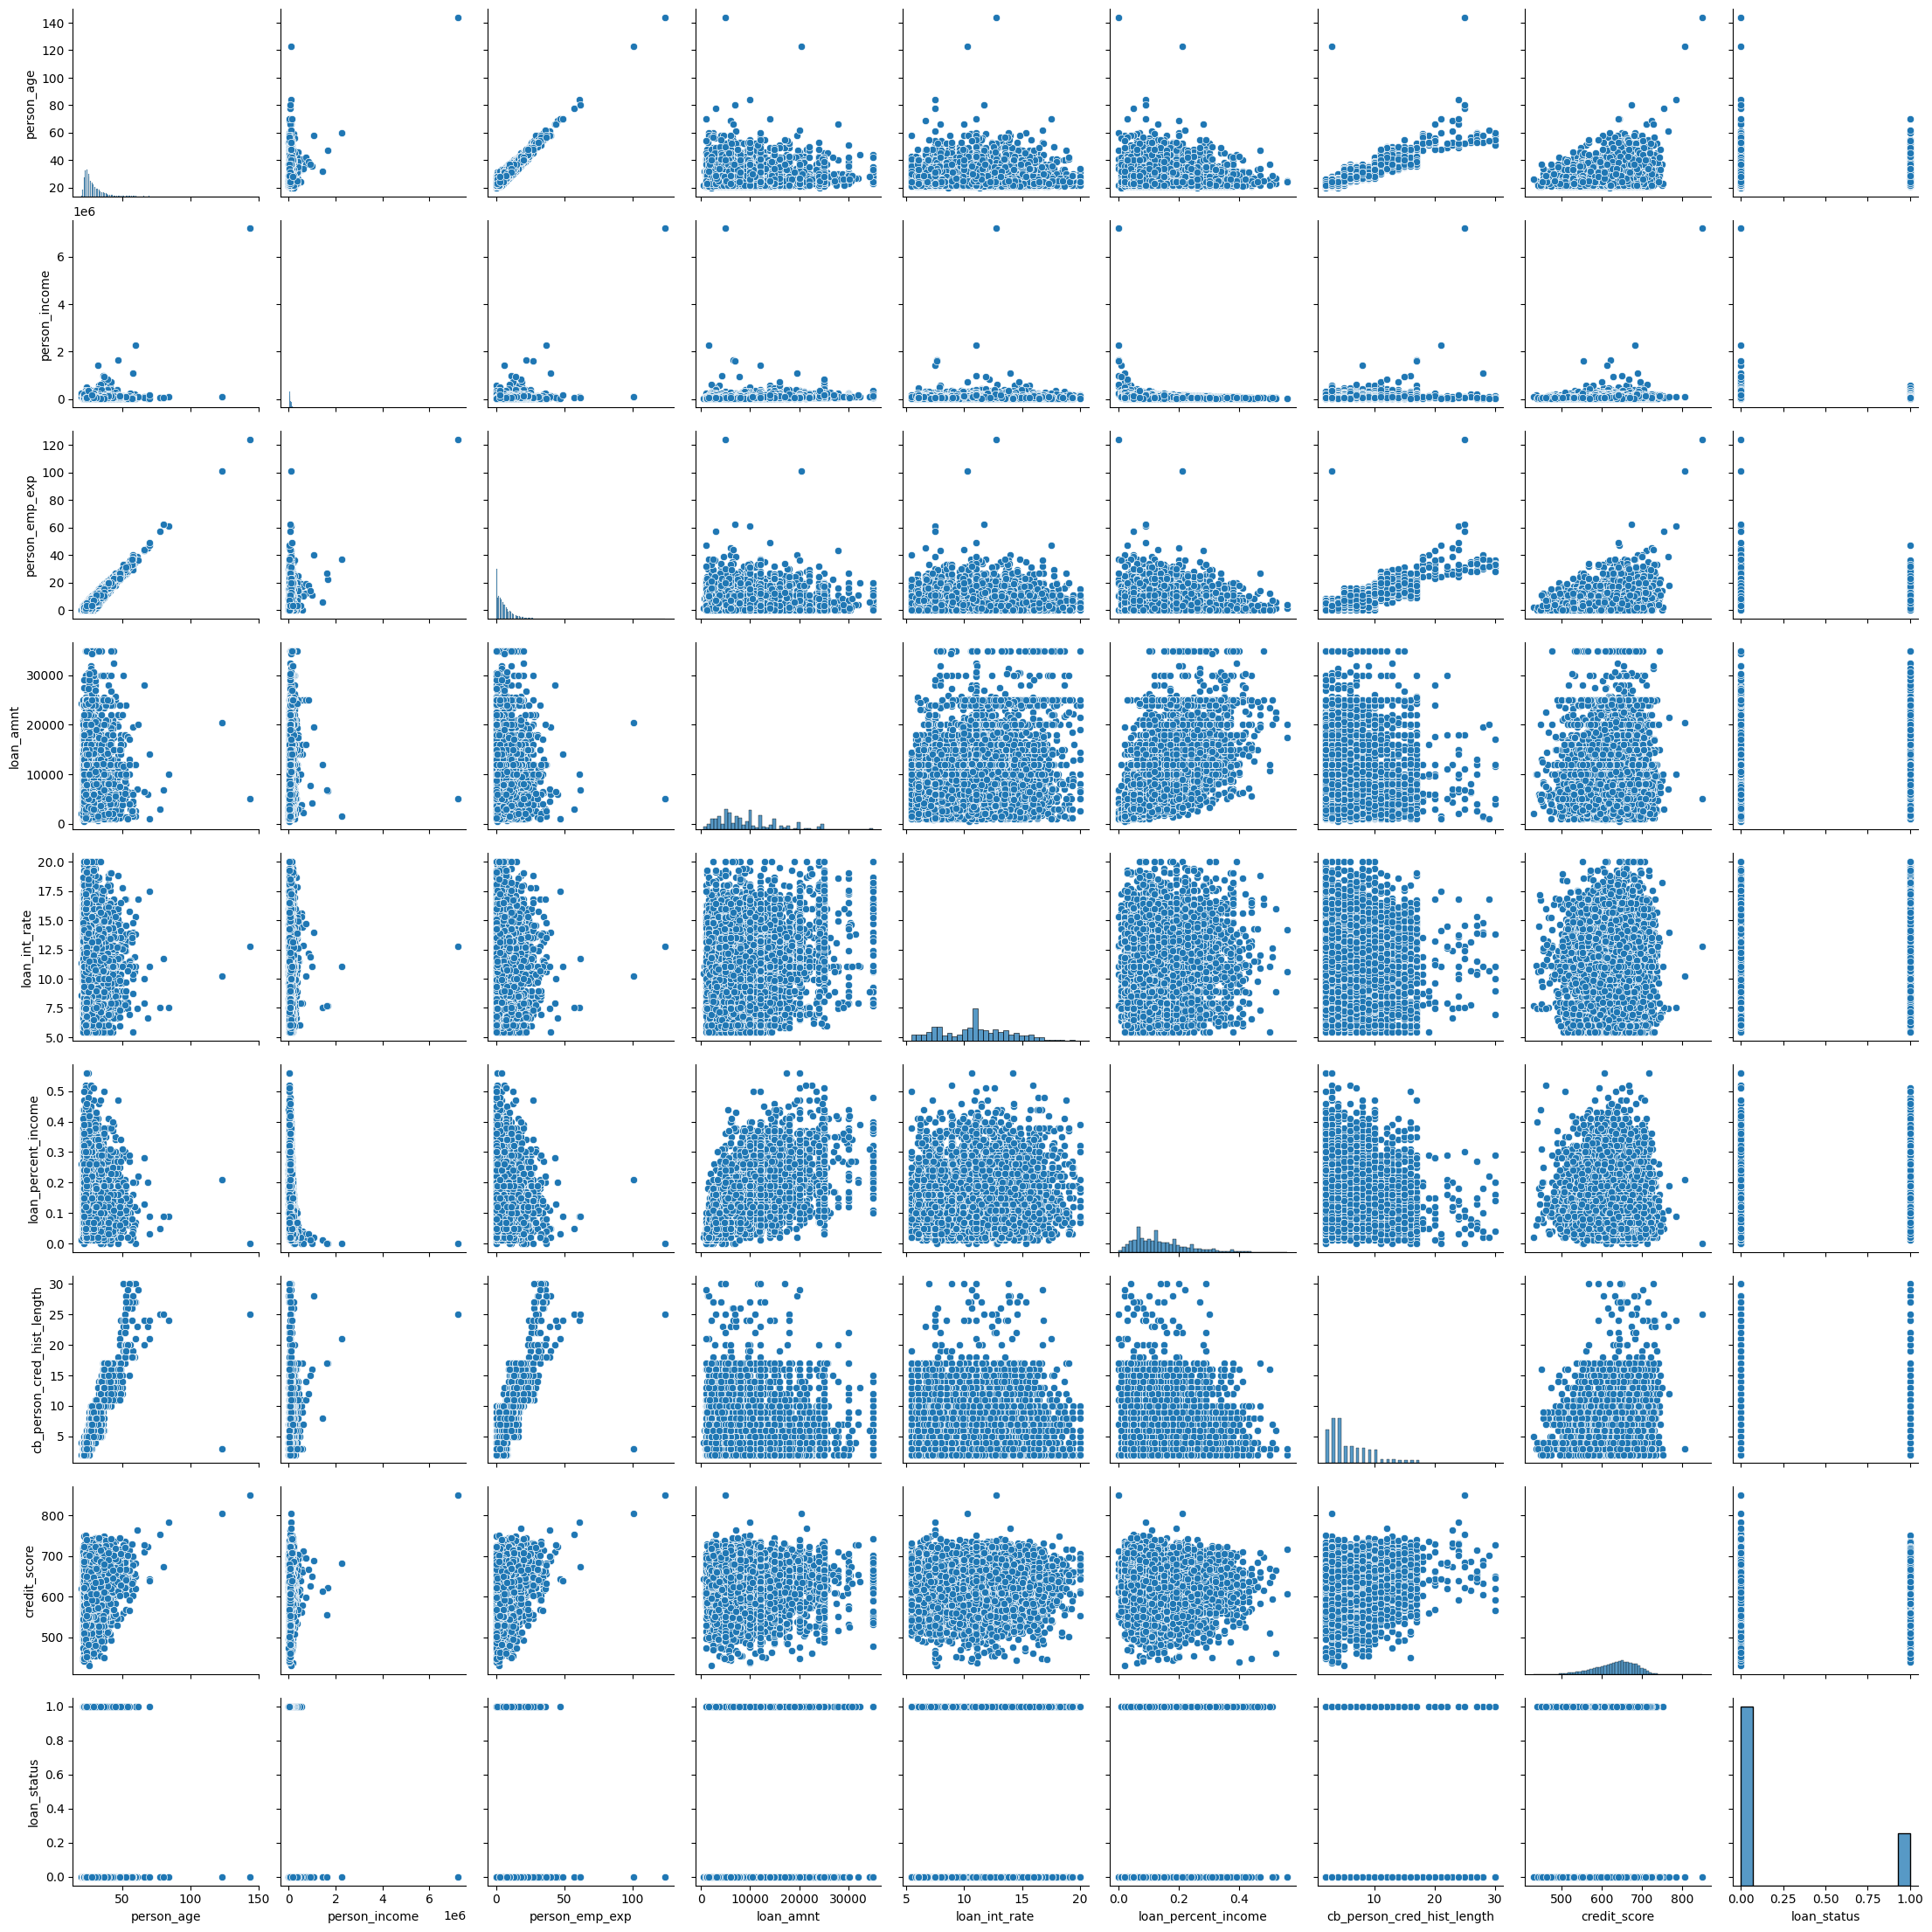

In [165]:
sns.pairplot(df)

<Axes: ylabel='Frequency'>

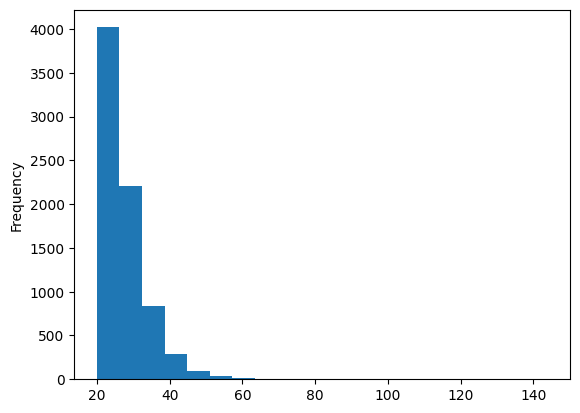

In [166]:
df["person_age"].plot.hist(bins=20)

In [167]:
mean_imputer = SimpleImputer(strategy="mean")
df[["person_age"]] = mean_imputer.fit_transform(df[["person_age"]])
df.isna().sum()

person_age                          0
person_gender                     294
person_education                  422
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                         336
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      522
previous_loan_defaults_on_file      0
loan_status                       250
dtype: int64

<Axes: xlabel='person_gender'>

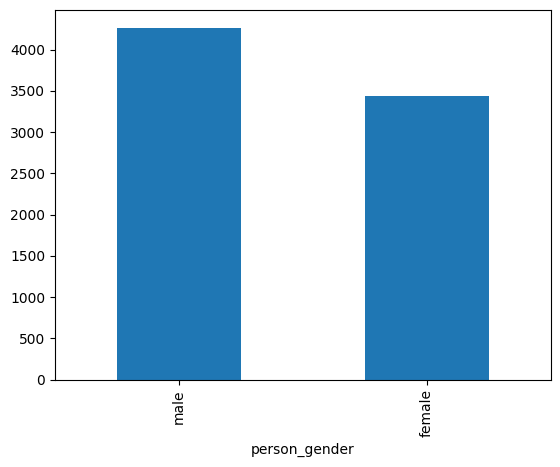

In [168]:
df["person_gender"].value_counts().plot.bar()

In [169]:
one_hot_encoded_values = pd.get_dummies(df["person_gender"])
df = pd.concat([df, one_hot_encoded_values], axis=1)
df.drop(columns="person_gender", inplace=True)
df.isna().sum()

person_age                          0
person_education                  422
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                         336
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      522
previous_loan_defaults_on_file      0
loan_status                       250
female                              0
male                                0
dtype: int64

In [170]:
df.head()

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,female,male
0,26.0,Associate,43996.0,4,RENT,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0,False,True
1,22.0,Bachelor,115708.0,0,MORTGAGE,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0,True,False
2,25.0,High School,57827.0,0,RENT,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0,True,False
3,31.0,Master,126727.0,9,RENT,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0,True,False
4,33.0,Associate,120987.0,10,OWN,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0,True,False


In [171]:
df["person_education"].value_counts()

person_education
Bachelor       2234
Associate      2051
High School    2017
Master         1172
Doctorate       104
Name: count, dtype: int64

In [172]:
#education_order = ["High School", "Associate", "Bachelor", "Master", "Doctorate", np.nan]
#encoder = OrdinalEncoder(categories=[education_order])
#df[['person_education']] = encoder.fit_transform(df[['person_education']])

<Axes: ylabel='Frequency'>

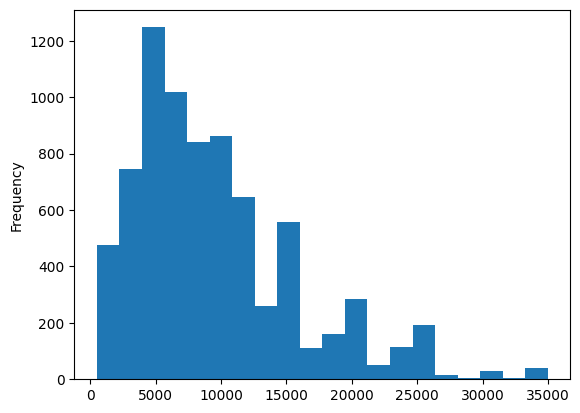

In [173]:
df["loan_amnt"].plot.hist(bins=20)

In [174]:
imputer = SimpleImputer(strategy="median")
df[["loan_amnt"]] = imputer.fit_transform(df[["loan_amnt"]])
df.isna().sum()

person_age                          0
person_education                  422
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                           0
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      522
previous_loan_defaults_on_file      0
loan_status                       250
female                              0
male                                0
dtype: int64

<Axes: ylabel='Frequency'>

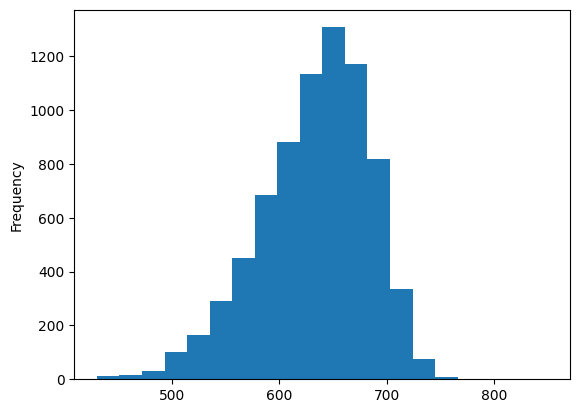

In [175]:
df["credit_score"].plot.hist(bins=20)

In [176]:
imputer = SimpleImputer(strategy="mean")
df[["credit_score"]] = imputer.fit_transform(df[["credit_score"]])
df.isna().sum()

person_age                          0
person_education                  422
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                           0
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                        0
previous_loan_defaults_on_file      0
loan_status                       250
female                              0
male                                0
dtype: int64

In [177]:
df.head()

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,female,male
0,26.0,Associate,43996.0,4,RENT,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0,False,True
1,22.0,Bachelor,115708.0,0,MORTGAGE,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0,True,False
2,25.0,High School,57827.0,0,RENT,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0,True,False
3,31.0,Master,126727.0,9,RENT,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0,True,False
4,33.0,Associate,120987.0,10,OWN,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0,True,False


In [178]:
df = df.dropna(subset=["loan_status"], axis=0)

In [179]:
df["person_education"] = df["person_education"].fillna("Missing")
values = ["High School", "Associate", "Bachelor", "Master", "Doctorate", "Missing"]
ordinal_encoder = OrdinalEncoder(categories=[values])
encoded_values = ordinal_encoder.fit_transform(df[["person_education"]])
df["person_education"] = encoded_values
df.isna().sum()

person_age                        0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
female                            0
male                              0
dtype: int64

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7750 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      7750 non-null   float64
 1   person_education                7750 non-null   float64
 2   person_income                   7750 non-null   float64
 3   person_emp_exp                  7750 non-null   int64  
 4   person_home_ownership           7750 non-null   object 
 5   loan_amnt                       7750 non-null   float64
 6   loan_intent                     7750 non-null   object 
 7   loan_int_rate                   7750 non-null   float64
 8   loan_percent_income             7750 non-null   float64
 9   cb_person_cred_hist_length      7750 non-null   float64
 10  credit_score                    7750 non-null   float64
 11  previous_loan_defaults_on_file  7750 non-null   object 
 12  loan_status                     7750 no

In [181]:
df.head()

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,female,male
0,26.0,1.0,43996.0,4,RENT,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0,False,True
1,22.0,2.0,115708.0,0,MORTGAGE,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0,True,False
2,25.0,0.0,57827.0,0,RENT,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0,True,False
3,31.0,3.0,126727.0,9,RENT,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0,True,False
4,33.0,1.0,120987.0,10,OWN,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0,True,False


In [182]:
df["person_home_ownership"].value_counts()

person_home_ownership
RENT        4026
MORTGAGE    3201
OWN          500
OTHER         23
Name: count, dtype: int64

In [183]:
one_hot_encoded_values = pd.get_dummies(df["person_home_ownership"])
df = pd.concat([df, one_hot_encoded_values], axis=1)
df.drop(columns="person_home_ownership", inplace=True)

In [184]:
df["loan_intent"].value_counts()

loan_intent
EDUCATION            1529
MEDICAL              1471
VENTURE              1387
PERSONAL             1307
DEBTCONSOLIDATION    1262
HOMEIMPROVEMENT       794
Name: count, dtype: int64

In [185]:
one_hot_encoded_values = pd.get_dummies(df["loan_intent"])
df = pd.concat([df, one_hot_encoded_values], axis=1)
df.drop(columns="loan_intent", inplace=True)

In [186]:
df["previous_loan_defaults_on_file"].value_counts()

previous_loan_defaults_on_file
No     3876
Yes    3874
Name: count, dtype: int64

In [187]:
df["previous_loan_defaults_on_file"] = df["previous_loan_defaults_on_file"].map({'No':0, 'Yes':1})

In [188]:
df.head()

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,female,male,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,26.0,1.0,43996.0,4,5000.0,10.37,0.11,4.0,675.0,0,0.0,False,True,False,False,False,True,False,False,False,False,False,True
1,22.0,2.0,115708.0,0,20000.0,7.88,0.17,3.0,635.0,0,0.0,True,False,True,False,False,False,False,True,False,False,False,False
2,25.0,0.0,57827.0,0,6000.0,11.60,0.10,4.0,589.0,1,0.0,True,False,False,False,False,True,False,False,False,False,True,False
3,31.0,3.0,126727.0,9,24000.0,10.27,0.19,7.0,644.0,1,0.0,True,False,False,False,False,True,True,False,False,False,False,False
4,33.0,1.0,120987.0,10,25000.0,12.18,0.21,10.0,644.0,1,0.0,True,False,False,False,True,False,False,False,False,True,False,False


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7750 entries, 0 to 7999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      7750 non-null   float64
 1   person_education                7750 non-null   float64
 2   person_income                   7750 non-null   float64
 3   person_emp_exp                  7750 non-null   int64  
 4   loan_amnt                       7750 non-null   float64
 5   loan_int_rate                   7750 non-null   float64
 6   loan_percent_income             7750 non-null   float64
 7   cb_person_cred_hist_length      7750 non-null   float64
 8   credit_score                    7750 non-null   float64
 9   previous_loan_defaults_on_file  7750 non-null   int64  
 10  loan_status                     7750 non-null   float64
 11  female                          7750 non-null   bool   
 12  male                            7750 no

In [190]:
cols = ["male", "female", "MORTGAGE", "OTHER", "OWN", "RENT", "DEBTCONSOLIDATION", "EDUCATION", "HOMEIMPROVEMENT", "MEDICAL", "PERSONAL", "VENTURE"]
for col in cols:
    df[col] = df[col].astype(int)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7750 entries, 0 to 7999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      7750 non-null   float64
 1   person_education                7750 non-null   float64
 2   person_income                   7750 non-null   float64
 3   person_emp_exp                  7750 non-null   int64  
 4   loan_amnt                       7750 non-null   float64
 5   loan_int_rate                   7750 non-null   float64
 6   loan_percent_income             7750 non-null   float64
 7   cb_person_cred_hist_length      7750 non-null   float64
 8   credit_score                    7750 non-null   float64
 9   previous_loan_defaults_on_file  7750 non-null   int64  
 10  loan_status                     7750 non-null   float64
 11  female                          7750 non-null   int64  
 12  male                            7750 no

In [195]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

In [198]:
X, y = df.drop(columns=["loan_status"]), df["loan_status"]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(X_train,Y_train)

y_pred = classifier.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Accuracy: 0.8941935483870967
[[1135   61]
 [ 103  251]]
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      1196
         1.0       0.80      0.71      0.75       354

    accuracy                           0.89      1550
   macro avg       0.86      0.83      0.84      1550
weighted avg       0.89      0.89      0.89      1550

